# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [170]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head()

/tmp/ipykernel_63300/119744091.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [173]:
import flatiron_stats as fs

In [174]:
df['FormalEducation'].value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [175]:
education = 'FormalEducation'
salary = 'AdjustedCompensation'

degree = "Bachelor's degree"
masters = "Master's degree"

degree_salary = df[ (df[education] ==  degree) ][[salary]].dropna().reset_index(drop=True)
degree_salary.head()


,AdjustedCompensation
0,64184.800
1,20882.400
2,1483.900
3,20000.000
4,10858.848


In [176]:
masters_salary = df[ (df[education] ==  masters) ][[salary]].dropna().reset_index(drop=True)
masters_salary.head()

,AdjustedCompensation
0,250000.000
1,36634.400
2,53352.000
3,35419.104
4,80000.000


In [177]:
"""
Null hypothesis: The masters and degree salary are the same.
Alternative hypothesis: The masters and degree salary are the not same.

"""

'\nNull hypothesis: The masters and degree salary are the same.\nAlternative hypothesis: The masters and degree salary are the not same.\n\n'

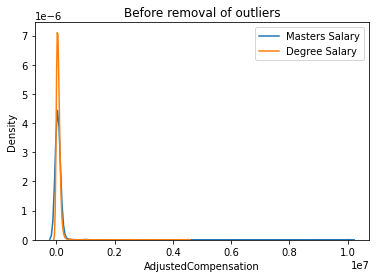

In [178]:
sns.kdeplot(degree_salary[salary])
sns.kdeplot(masters_salary[salary])
plt.title('Before removal of outliers')
plt.legend(labels = ['Masters Salary', 'Degree Salary'])
plt.show()

In [179]:
p_value = fs.p_value_welch_ttest(degree_salary, masters_salary,True)
print("Before checking for outliers")
print("\n\tDegree's Salary\t\tMasters salary")
print("Median: {}\t\t\t{}".format( degree_salary[salary].median(), masters_salary[salary].median() ))
print("Mean: \t{}\t{}".format( degree_salary[salary].mean(), masters_salary[salary].mean() ))
print("Size: \t{}\t\t\t{}".format( degree_salary[salary].count(), masters_salary[salary].count() ))

print("\nThe difference in means is: {}".format( np.abs(degree_salary[salary].mean() - masters_salary[salary].mean()) ) )
print("The p-value is using welch's t-test is (two-tail test): {}".format( p_value ))


Before checking for outliers

	Degree's Salary		Masters salary
Median: 38399.4			53812.170000000006
Mean: 	64887.097994618794	69139.8998712
Size: 	1107			1990

The difference in means is: 4252.8018765812085
The p-value is using welch's t-test is (two-tail test): [0.66155279]


In [180]:
# # function for checking outliers using the z -score method
# def outliers(column):
#     outliers = []
#     threshold = 3
#     mean = column.mean()
#     std = column.std()

#     for i in column:
#         z_score = ( i - mean )/std
#         if np.abs(z_score) > threshold:
#             outliers.append(i)
#     return outliers

# Changed the function to use quatiles instead

def outliers(column):
    outliers = []
    min_threshold, max_threshold = column.quantile([0.001,0.999])
    for i in column:
        if (i < min_threshold) | (i > max_threshold):
            outliers.append(i)
    return outliers


In [181]:
degree_salary_outliers = outliers(degree_salary[salary])
degree_salary_outliers

[9999999.0]

In [182]:
"""
From above we can see that degree_salary truly has some outliers

"""

'\nFrom above we can see that degree_salary truly has some outliers\n\n'

In [183]:
masters_salary_outliers = outliers(masters_salary[salary])
masters_salary_outliers

[2500000.0, 4498900.0]

In [184]:
"""
From above we can see that masters_salary truly has some outliers

"""

'\nFrom above we can see that masters_salary truly has some outliers\n\n'

In [185]:
# function to remove outliers and returns the new updated dataframe
def outliers_remover(dataset, outliers):
    subset = dataset.copy()
    for i in outliers:
        row_index = subset[ subset[salary] == i ].index
        subset.drop(row_index, inplace=True)
    return subset

In [186]:
degree_salary = outliers_remover(degree_salary, degree_salary_outliers).copy()

In [187]:
degree_salary[ degree_salary[salary] == 9999999.0] # picking a value in the outlier list

,AdjustedCompensation


In [188]:
masters_salary = outliers_remover(masters_salary, masters_salary_outliers).copy()

In [189]:
masters_salary[ masters_salary[salary] == 2500000.0] # picking a value in the outlier list

,AdjustedCompensation


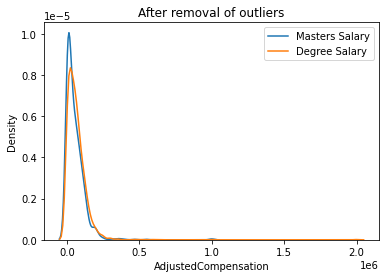

In [190]:
sns.kdeplot(degree_salary[salary])
sns.kdeplot(masters_salary[salary])
plt.title('After removal of outliers')
plt.legend(labels = ['Masters Salary', 'Degree Salary'])
plt.show()

In [191]:
p_value = fs.p_value_welch_ttest(degree_salary, masters_salary,True)
print("After checking for outliers")
print("\n\tDegree's Salary\t\tMasters salary")
print("Median: {}\t\t{}".format( degree_salary[salary].median(), masters_salary[salary].median() ))
print("Mean: \t{}\t{}".format( degree_salary[salary].mean(), masters_salary[salary].mean() ))
print("Size: \t{}\t\t\t{}".format( degree_salary[salary].count(), masters_salary[salary].count() ))

print("\nThe difference in means is: {}".format( np.abs(degree_salary[salary].mean() - masters_salary[salary].mean()) ) )
print("The p-value is using welch's t-test is (two-tail test): {}".format( p_value ))

After checking for outliers

	Degree's Salary		Masters salary
Median: 38399.4		53675.94500000001
Mean: 	55904.17584090687	65688.88367388734
Size: 	1106			1988

The difference in means is: 9784.707832980464
The p-value is using welch's t-test is (two-tail test): [0.00027082]


In [192]:
"""
Since the p-value is less that 0.05 we can confidently reject the null hypothesis
Hence the conclusion that there is a statistical differnce between the salary of the employees with a masters degree and thoes with a masters degree.

"""

'\nSince the p-value is less that 0.05 we can confidently reject the null hypothesis\nHence the conclusion that there is a statistical differnce between the salary of the employees with a masters degree and thoes with a masters degree.\n\n'

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [193]:
education = 'FormalEducation'
salary = 'AdjustedCompensation'

degree = "Bachelor's degree"
doctorate = "Doctoral degree"

doctorate_salary = df[ (df[education] ==  doctorate) ][[salary]].dropna().reset_index(drop=True)
doctorate_salary.head()

,AdjustedCompensation
0,100000.000
1,172144.440
2,133000.000
3,15000.000
4,43049.736


In [194]:
"""
Null hypothesis: The masters and degree salary are the same.
Alternative hypothesis: The masters and degree salary are the not same.

"""

'\nNull hypothesis: The masters and degree salary are the same.\nAlternative hypothesis: The masters and degree salary are the not same.\n\n'

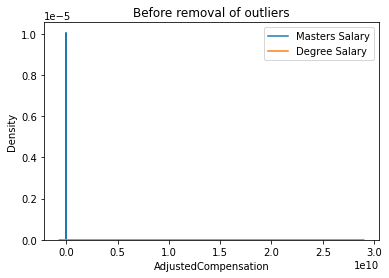

In [195]:
sns.kdeplot(degree_salary[salary])
sns.kdeplot(doctorate_salary[salary])
plt.title('Before removal of outliers')
plt.legend(labels = ['Masters Salary', 'Degree Salary'])
plt.show()

In [196]:
p_value = fs.p_value_welch_ttest(degree_salary, doctorate_salary,True)
print("Before checking for outliers")
print("\n\tDegree's Salary\t\tMasters salary")
print("Median: {}\t\t{}".format( degree_salary[salary].median(), doctorate_salary[salary].median() ))
print("Mean: \t{}\t{}".format( degree_salary[salary].mean(), doctorate_salary[salary].mean() ))
print("Size: \t{}\t\t\t{}".format( degree_salary[salary].count(), doctorate_salary[salary].count() ))

print("\nThe difference in means is: {}".format( np.abs(degree_salary[salary].mean() - doctorate_salary[salary].mean()) ) )
print("The p-value is using welch's t-test is (two-tail test): {}".format( p_value ))

Before checking for outliers

	Degree's Salary		Masters salary
Median: 38399.4		74131.91999999998
Mean: 	55904.17584090687	29566175.762453098
Size: 	1106			967

The difference in means is: 29510271.58661219
The p-value is using welch's t-test is (two-tail test): [0.31350037]


In [197]:
doctorate_salary_outliers = outliers(doctorate_salary[salary])
doctorate_salary_outliers

[-73.516311, 28297400000.0]

In [198]:
#  Removing the outliers
doctorate_salary = outliers_remover(doctorate_salary, doctorate_salary_outliers).copy()

In [199]:
doctorate_salary[ doctorate_salary[salary] ==  28297400000.0] # checking if the outlier has been removed

,AdjustedCompensation


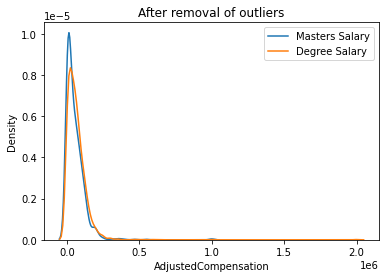

In [200]:
sns.kdeplot(degree_salary[salary])
sns.kdeplot(masters_salary[salary])
plt.title('After removal of outliers')
plt.legend(labels = ['Masters Salary', 'Degree Salary'])
plt.show()

In [201]:
p_value = fs.p_value_welch_ttest(degree_salary, doctorate_salary,True)
print("After checking and removing the outliers")
print("\n\tDegree's Salary\t\tMasters salary")
print("Median: {}\t\t{}".format( degree_salary[salary].median(), doctorate_salary[salary].median() ))
print("Mean: \t{}\t{}".format( degree_salary[salary].mean(), doctorate_salary[salary].mean() ))
print("Size: \t{}\t\t\t{}".format( degree_salary[salary].count(), doctorate_salary[salary].count() ))

print("\nThe difference in means is: {}".format( np.abs(degree_salary[salary].mean() - doctorate_salary[salary].mean()) ) )
print("The p-value is using welch's t-test is (two-tail test): {}".format( p_value ))

After checking and removing the outliers

	Degree's Salary		Masters salary
Median: 38399.4		74131.91999999998
Mean: 	55904.17584090687	303722.31689995027
Size: 	1106			965

The difference in means is: 247818.1410590434
The p-value is using welch's t-test is (two-tail test): [0.2526626]


In [202]:
"""
Since the p-value is less that 0.05 we can confidently reject the null hypothesis
Hence the conclusion that there is a statistical differnce between the salary of the employees with a masters degree and thoes with a doctorate's degree.

"""

"\nSince the p-value is less that 0.05 we can confidently reject the null hypothesis\nHence the conclusion that there is a statistical differnce between the salary of the employees with a masters degree and thoes with a doctorate's degree.\n\n"

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [203]:
"""
Null hypothesis: The salaries of different education levels are the same.
Alternative hypothesis: The salaries of different education levels are not the same.

"""

'\nNull hypothesis: The salaries of different education levels are the same.\nAlternative hypothesis: The salaries of different education levels are not the same.\n\n'

In [204]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# indentifying if ther are any outliers in the whole 'AdjustedCompensation' column (salary)
salary_outliers = outliers(df[salary])
salary_outliers

[209000000.0, 9999999.0, -73.516311, 28297400000.0, 2500000.0, 4498900.0]

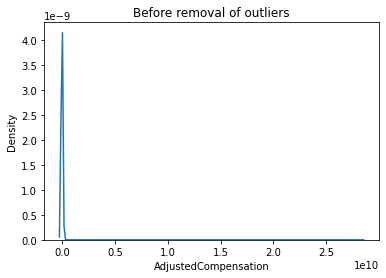

In [205]:
sns.kdeplot(df[salary])
plt.title('Before removal of outliers')
plt.show()

In [206]:
# Removing the outlier
df = outliers_remover(df, salary_outliers).copy()

In [207]:
df[ df[salary] ==  28297400000.0]

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation


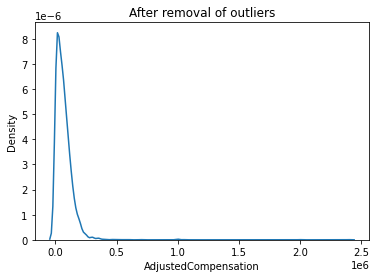

In [208]:
sns.kdeplot(df[salary])
plt.title('After removal of outliers')
plt.show()

In [209]:
formula = '{} ~ {}'.format(salary, education)
lm = ols(formula, df).fit()
model = sm.stats.anova_lm(lm, typ=2)
model

,sum_sq,df,F,PR(>F)
FormalEducation,7.287325e+11,6.0,18.271148,4.599467e-21
Residual,2.877654e+13,4329.0,NaN,NaN


In [210]:
"""
Since the p-value is less than 0.5 we are confident enough to reject the null hypothesis.
Hence the conclusion that the salaries of differnt education level do vary significantly.

"""

'\nSince the p-value is less than 0.5 we are confident enough to reject the null hypothesis.\nHence the conclusion that the salaries of differnt education level do vary significantly.\n\n'

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!